In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [83]:
df.shape

(8425, 23)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [85]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [3]:
df.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1, inplace = True)

Dropping these 4 columns as almost 1/3rd of their data is null, hence they wont help much in predicting the outcome.

In [88]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop(['Date'], axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


Spliting the date to Day, Month & year to analysis it further and dropping the date column

In [5]:
print('Before Drop shape : ', df.shape)
df.dropna(subset = ['RainTomorrow','RainToday'], inplace = True)
print('After Drop shape : ', df.shape)

Before Drop shape :  (8425, 21)
After Drop shape :  (8079, 21)


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['RainTomorrow'] = le.fit_transform( df['RainTomorrow'])
df['RainToday'] = le.fit_transform( df['RainToday'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


In [7]:
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mode()[0])
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mode()[0])
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mode()[0])
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mode()[0])
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0])
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mode()[0])
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mode()[0])
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mode()[0])
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mode()[0])

df.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      945
WindGustSpeed      0
WindDir9am       795
WindDir3pm       283
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
Year               0
Month              0
Day                0
dtype: int64

# Data Visualization

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

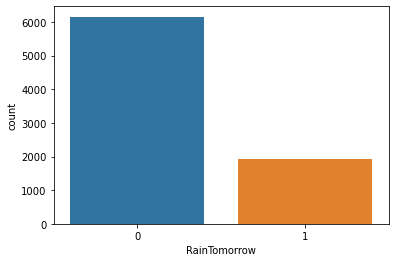

In [94]:
sns.countplot(x = 'RainTomorrow', data = df)

Too much difference between the frequency of two outcome, NO is almost 3 times that of YES

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'MinTemp'),
  Text(0, 1.5, 'MaxTemp'),
  Text(0, 2.5, 'Rainfall'),
  Text(0, 3.5, 'WindGustSpeed'),
  Text(0, 4.5, 'WindSpeed9am'),
  Text(0, 5.5, 'WindSpeed3pm'),
  Text(0, 6.5, 'Humidity9am'),
  Text(0, 7.5, 'Humidity3pm'),
  Text(0, 8.5, 'Pressure9am'),
  Text(0, 9.5, 'Pressure3pm'),
  Text(0, 10.5, 'Temp9am'),
  Text(0, 11.5, 'Temp3pm'),
  Text(0, 12.5, 'RainToday'),
  Text(0, 13.5, 'RainTomorrow'),
  Text(0, 14.5, 'Year'),
  Text(0, 15.5, 'Month'),
  Text(0, 16.5, 'Day')])

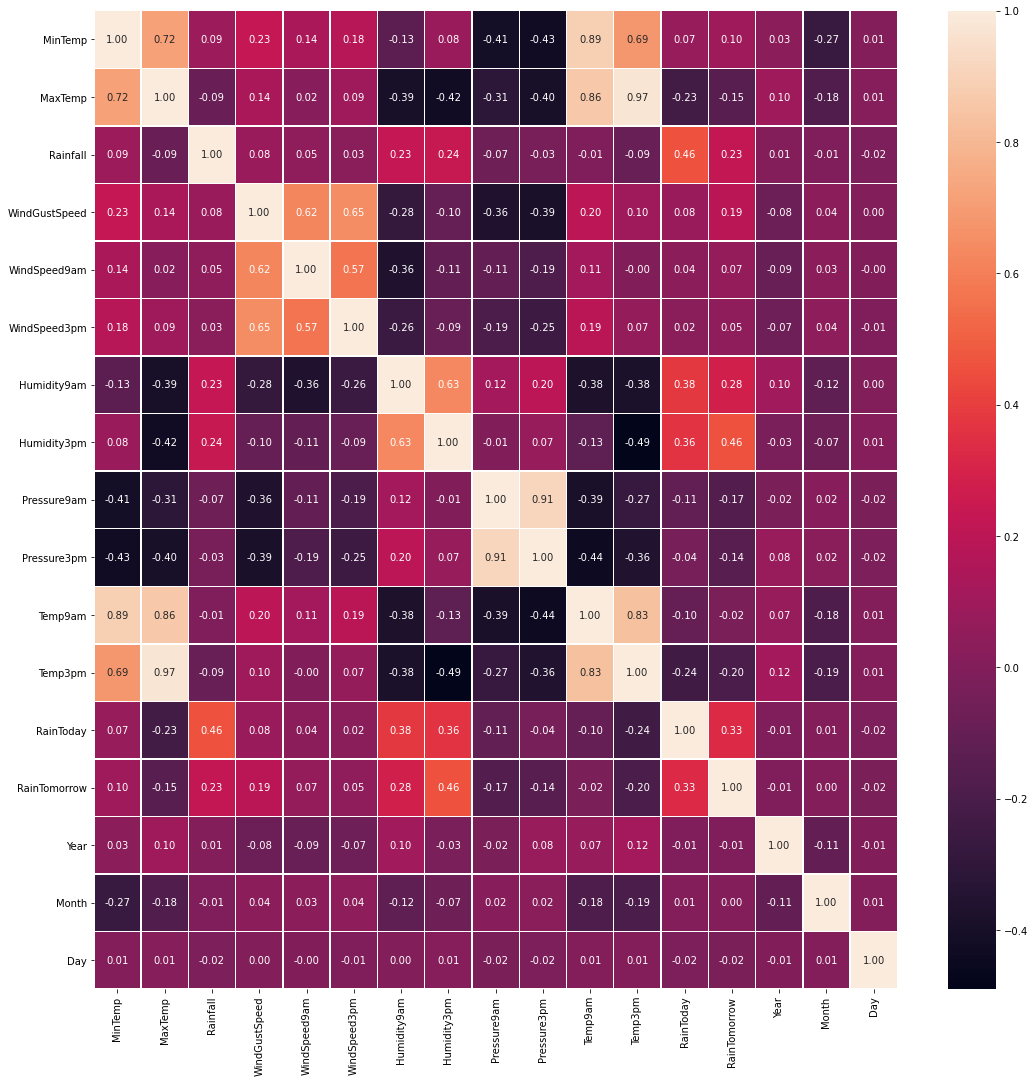

In [95]:
f,axis = plt.subplots(figsize=(18, 18))
sns.heatmap( df.corr(), annot=True, linewidths=.4, fmt= '.2f', ax = axis )
plt.yticks(rotation = 360)

There seems to be relationship between :-
1) Raintoday & Raintomorrow

2) MaxTemp & MinTemp

3) Pressure9h & pressure3h

4) Temp9am & Temp3pm

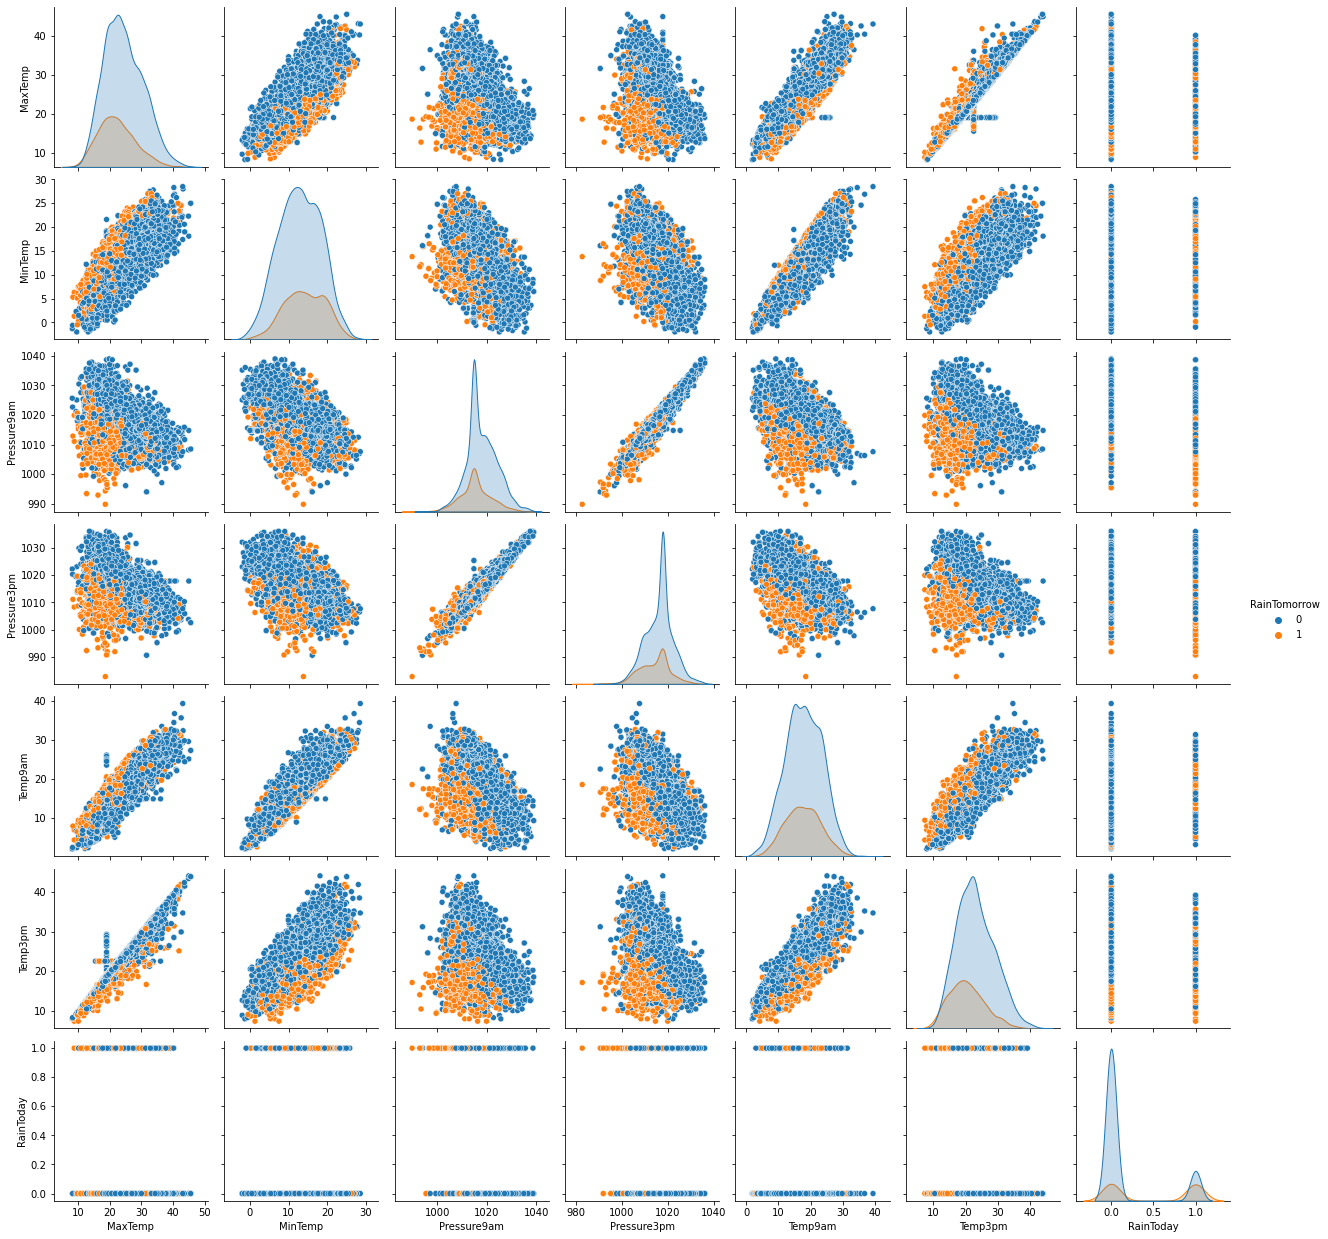

In [96]:
sns.pairplot( data = df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday'), hue='RainTomorrow' )

In [67]:
df.isnull().sum()

Location            0
MinTemp            48
MaxTemp            34
Rainfall            0
WindGustDir       945
WindGustSpeed     945
WindDir9am        795
WindDir3pm        283
WindSpeed9am       49
WindSpeed3pm       83
Humidity9am        36
Humidity3pm        80
Pressure9am      1285
Pressure3pm      1286
Temp9am            33
Temp3pm            74
RainToday           0
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

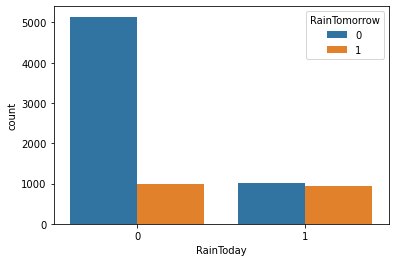

In [97]:
sns.countplot(x = 'RainToday', data = df, hue = 'RainTomorrow')

There are more chances of rain tomorrow if it had rained previous day also

In [8]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [9]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

# Model Selection for predicting Rainfall Tomorrow

In [103]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [105]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = mms.fit_transform(x)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 42, test_size = 0.2 )

# 1. Logisitic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

print('Classification Report with LogisticRegression :', "\n",  classification_report(y_test,lr_predict))
print('Accuracy with LogisticRegression : ', accuracy_score(lr_predict,y_test) , "\n")
print('Confusion Matrix with LogisticRegression : ', "\n", confusion_matrix(lr_predict,y_test), "\n")
print('roc_auc_score with LogisticRegression: ', roc_auc_score(lr_predict,y_test))

Classification Report with LogisticRegression : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1263
           1       0.70      0.49      0.58       353

    accuracy                           0.84      1616
   macro avg       0.79      0.71      0.74      1616
weighted avg       0.83      0.84      0.83      1616

Accuracy with LogisticRegression :  0.8428217821782178 

Confusion Matrix with LogisticRegression :  
 [[1190  181]
 [  73  172]] 

roc_auc_score with LogisticRegression:  0.7850101966388306


# 2. RandomForestClassifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier( max_depth = 16, min_samples_leaf = 1, min_samples_split = 2,
                             n_estimators = 100, random_state = 12345)

rfc.fit( x_train, y_train )
rfc_pred = rfc.predict(x_test)

print('Classification Report with RandomForestClassifier :', "\n",  classification_report(y_test,rfc_pred))
print('Accuracy with RandomForestClassifier : ', accuracy_score(rfc_pred,y_test) , "\n")
print('Confusion Matrix with RandomForestClassifier : ', "\n", confusion_matrix(rfc_pred,y_test), "\n")
print('roc_auc_score with RandomForestClassifier: ', roc_auc_score(rfc_pred,y_test))

Classification Report with RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1263
           1       0.88      0.67      0.76       353

    accuracy                           0.91      1616
   macro avg       0.90      0.82      0.85      1616
weighted avg       0.91      0.91      0.90      1616

Accuracy with RandomForestClassifier :  0.9071782178217822 

Confusion Matrix with RandomForestClassifier :  
 [[1231  118]
 [  32  235]] 

roc_auc_score with RandomForestClassifier:  0.8963388055516224


# 3. DecisionTreeClassifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

print('Classification Report with DecisionTreeClassifier :', "\n",  classification_report(y_test,dtc_pred))
print('Accuracy with DecisionTreeClassifier : ', accuracy_score(dtc_pred,y_test) , "\n")
print('Confusion Matrix with DecisionTreeClassifier : ', "\n", confusion_matrix(dtc_pred,y_test), "\n")
print('roc_auc_score with DecisionTreeClassifier: ', roc_auc_score(dtc_pred,y_test))

Classification Report with DecisionTreeClassifier : 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1263
           1       0.61      0.54      0.57       353

    accuracy                           0.82      1616
   macro avg       0.74      0.72      0.73      1616
weighted avg       0.82      0.82      0.82      1616

Accuracy with DecisionTreeClassifier :  0.8236386138613861 

Confusion Matrix with DecisionTreeClassifier :  
 [[1140  162]
 [ 123  191]] 

roc_auc_score with DecisionTreeClassifier:  0.7419281458217147


# 4. XGBClassifier

In [113]:
from xgboost import XGBClassifier

xgb = XGBClassifier( n_estimators = 500, max_depth = 16)

xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print('Classification Report with XGBClassifier :', "\n",  classification_report(y_test,xgb_pred))
print('Accuracy with XGBClassifier : ', accuracy_score(xgb_pred,y_test) , "\n")
print('Confusion Matrix with XGBClassifier : ', "\n", confusion_matrix(xgb_pred,y_test), "\n")
print('roc_auc_score with XGBClassifier: ', roc_auc_score(xgb_pred,y_test))

[13:15:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report with XGBClassifier : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1263
           1       0.83      0.71      0.77       353

    accuracy                           0.91      1616
   macro avg       0.88      0.84      0.86      1616
weighted avg       0.90      0.91      0.90      1616

Accuracy with XGBClassifier :  0.906559405940594 

Confusion Matrix with XGBClassifier :  
 [[1213  101]
 [  50  252]] 

roc_auc_score with XGBClassifier:  0.8787862751620349


# 5. SVC 

In [114]:
from sklearn.svm import SVC

svm = SVC(kernel='linear') 
svm.fit(x_train,y_train)

svm_pred = svm.predict(x_test)


print('Classification Report with SVC :', "\n",  classification_report(y_test,svm_pred))
print('Accuracy with SVC : ', accuracy_score(svm_pred,y_test) , "\n")
print('Confusion Matrix with SVC : ', "\n", confusion_matrix(svm_pred,y_test), "\n")
print('roc_auc_score with SVC: ', roc_auc_score(svm_pred,y_test))

Classification Report with SVC : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1263
           1       0.73      0.47      0.57       353

    accuracy                           0.85      1616
   macro avg       0.80      0.71      0.74      1616
weighted avg       0.83      0.85      0.83      1616

Accuracy with SVC :  0.8452970297029703 

Confusion Matrix with SVC :  
 [[1201  188]
 [  62  165]] 

roc_auc_score with SVC:  0.7957615373149003


# 6. AdaBoostClassifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)

adaboost_pred = adaboost.predict(x_test)

print('Classification Report with AdaBoostClassifier :', "\n",  classification_report(y_test,adaboost_pred))
print('Accuracy with AdaBoostClassifier : ', accuracy_score(adaboost_pred,y_test) , "\n")
print('Confusion Matrix with AdaBoostClassifier : ', "\n", confusion_matrix(adaboost_pred,y_test), "\n")
print('roc_auc_score with AdaBoostClassifier: ', roc_auc_score(adaboost_pred,y_test))

Classification Report with AdaBoostClassifier : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1263
           1       0.70      0.52      0.59       353

    accuracy                           0.85      1616
   macro avg       0.79      0.73      0.75      1616
weighted avg       0.84      0.85      0.84      1616

Accuracy with AdaBoostClassifier :  0.8459158415841584 

Confusion Matrix with AdaBoostClassifier :  
 [[1185  171]
 [  78  182]] 

roc_auc_score with AdaBoostClassifier:  0.7869469026548672


In [116]:
import pickle
filename = 'rainfall_pred_YN.pkl'
pickle.dump( rfc, open( filename, 'wb') )

Saving the model with RandomForestClassifier as the accuracy is 91 % the greatest among all the other models

In [118]:
filename = 'rainfall_pred_YN.pkl'
loaded_model = pickle.load( open ( filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9071782178217822


# Model Selection for predicting amount of Rainfall

<AxesSubplot:ylabel='Rainfall'>

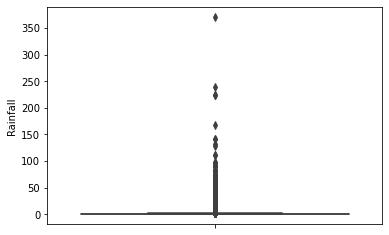

In [11]:
import seaborn as sns
sns.boxplot (y = 'Rainfall', data = df)

<AxesSubplot:ylabel='Rainfall'>

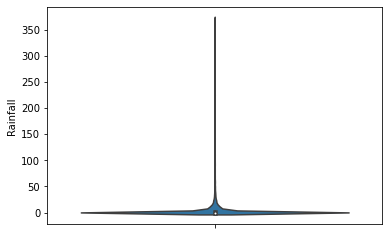

In [12]:
sns.violinplot (y = 'Rainfall', data = df)

It has many outliers, need to remove, so that performance can be improved

In [13]:
IQR = df['Rainfall'].quantile(0.75) - df['Rainfall'].quantile(0.25)
Lower_fence = df['Rainfall'].quantile(0.25) - (IQR * 3)
Upper_fence = df['Rainfall'].quantile(0.75) + (IQR * 3)
print( 'Rainfall outliers are values : < ', round(Lower_fence,2), ' or > ' , round(Upper_fence,2) )

Rainfall outliers are values : <  -3.0  or >  4.0


Calculating outliers to enhance the performance of the model

In [14]:
df2 = df[ ( df['Rainfall'] > -3 ) & ( df['Rainfall'] < 4 ) ]
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


<AxesSubplot:ylabel='Rainfall'>

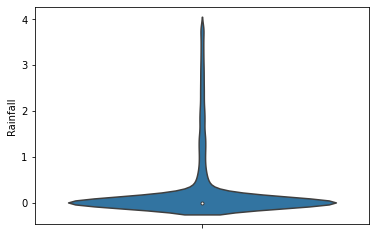

In [15]:
sns.violinplot (y = 'Rainfall', data = df2)

after removing the outliers, seems like the data is distributed well now

In [17]:
df2.shape

(6837, 21)

In [18]:
x = df2.drop(['Rainfall'], axis = 1)
y = df2['Rainfall']

In [213]:
x

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
4,1,17.5,32.3,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5
5,1,14.6,29.7,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,2008,12,6
9,1,13.1,30.1,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1,0,2008,12,10
11,1,15.9,21.7,5,31.0,4,1,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,1,1,2008,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377,4,25.6,34.1,3,35.0,5,6,9.0,17.0,71.0,55.0,1011.2,1006.9,29.2,33.1,0,1,2012,11,2
8378,4,23.2,33.4,9,48.0,2,14,9.0,17.0,88.0,58.0,1010.3,1007.0,26.0,32.3,1,0,2012,11,3
8381,4,25.2,34.5,5,39.0,3,5,11.0,22.0,66.0,46.0,1011.3,1007.9,29.6,33.4,1,0,2012,11,6
8383,4,24.9,32.8,14,37.0,5,7,13.0,20.0,72.0,55.0,1009.9,1006.2,29.5,32.0,1,0,2012,11,8


In [214]:
y

0        0.6
4        1.0
5        0.2
9        1.4
11       2.2
        ... 
8377     1.0
8378    31.6
8381     3.0
8383    20.4
8394     0.4
Name: Rainfall, Length: 2730, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = mms.fit_transform(x)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 42, test_size = 0.2 )

# 1. LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

linreg = LinearRegression()
linreg.fit( x_train, y_train )
linreg_pred = linreg.predict ( x_test )

print('Score with Linear Regression is', r2_score( y_test, linreg_pred ))
print('LinearRegression RMSE value : ' , np.sqrt(mean_squared_error( y_test, linreg_pred )))

Score with Linear Regression is 0.8206274238257317
LinearRegression RMSE value :  0.32849294624846326


# 2. KNeighborsRegressor

In [227]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
knn_grid = [{'n_neighbors': [i+1 for i in range(10)] }, ]

knn_search = GridSearchCV (knn, knn_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
knn_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [228]:
knn_search.best_params_

{'n_neighbors': 10}

In [229]:
knn_reg = knn_search.best_estimator_
knn_reg.fit(x_train, y_train)
knn_pred = knn_reg.predict(x_test)
print('KNN RMSE value : ' , np.sqrt(mean_squared_error(knn_pred, y_test)))
print('Score with KNN Regression is', r2_score( y_test, knn_pred ))

KNN RMSE value :  0.331269488006684
Score with KNN Regression is 0.8175823646119047


# 3. SVR

In [230]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma}

In [231]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1)
svm_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [233]:
svm_search.best_params_

{'kernel': 'poly', 'gamma': 0.1, 'C': 10}

In [234]:
svm_reg = svm_search.best_estimator_
svm_reg.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error

svm_pred = svm_reg.predict(x_test)
print('SVR RMSE value : ' , np.sqrt(mean_squared_error(svm_pred, y_test)))
print('Score with SVR Regression is', r2_score( y_test, svm_pred ))

SVR RMSE value :  0.3353892720345126
Score with SVR Regression is 0.8130169314549898


# 4. RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

ensemble = RandomForestRegressor()
ensemble_grid =  {'n_estimators': [(i+1)*10 for i in range(20)], 'criterion': ['mse', 'mae'], 'bootstrap': [True, False]}

ensemble_search = RandomizedSearchCV(ensemble, ensemble_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True, n_jobs=-1, n_iter=10, verbose=1)
ensemble_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [33]:
ensemble_search.best_params_

{'n_estimators': 160, 'criterion': 'mae', 'bootstrap': True}

In [34]:
ensemble_reg = ensemble_search.best_estimator_
ensemble_reg.fit(x_train, y_train)
ensemble_pred = ensemble_reg.predict(x_test)

print('RandomForestRegressor RMSE value : ' , np.sqrt(mean_squared_error(ensemble_pred, y_test)))
print('Score with RandomForestRegressor is', r2_score( y_test, ensemble_pred ))

RandomForestRegressor RMSE value :  0.2843684259972089
Score with RandomForestRegressor is 0.8655791314798487


# 5. XGBRegressor

In [21]:
max_depth = [1, 2, 3, 4, 5]
learning_rate = [0.01, 0.05, 0.1]
n_estimators = [100, 200, 300, 400, 500]
reg_lambda = [0.001, 0.1, 1.0, 10.0, 100.0] 

tuned_params = {'max_depth': max_depth, 'learning_rate': learning_rate, 
                'n_estimators' : n_estimators, 'reg_lambda' : reg_lambda}

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb =  XGBRegressor()

xgb_search = RandomizedSearchCV( xgb, tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
xgb_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [23]:
xgb_search.best_params_

{'reg_lambda': 1.0, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.05}

In [24]:
xgb_reg = xgb_search.best_estimator_
xgb_reg.fit(x_train, y_train)
xgb_pred = xgb_reg.predict(x_test)

print('XGBRegressor RMSE value : ' , np.sqrt(mean_squared_error(xgb_pred, y_test)))
print('Score with XGBRegressor is', r2_score( y_test, xgb_pred ))

XGBRegressor RMSE value :  0.29230264553519564
Score with XGBRegressor is 0.8579734816242264


# 6. DecisionTreeRegressor

In [25]:
max_depth = list(range(3,30))
param_grid = {'max_depth' : max_depth }

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()

dtr_search = GridSearchCV( dtr, param_grid, cv =10 )
dtr_search.fit( x_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [28]:
dtr_search.best_params_

{'max_depth': 3}

In [29]:
dtr_reg = dtr_search.best_estimator_
dtr_reg.fit(x_train, y_train)
dtr_pred = dtr_reg.predict(x_test)

print('DecisionTreeRegressor RMSE value : ' , np.sqrt(mean_squared_error(dtr_pred, y_test)))
print('Score with DecisionTreeRegressor is', r2_score( y_test, dtr_pred ))

DecisionTreeRegressor RMSE value :  0.33310879424561596
Score with DecisionTreeRegressor is 0.8155510676438971


In [35]:
import pickle
filename = 'rainfall_pred_quantity.pkl'
pickle.dump( ensemble_reg, open ( filename, 'wb' ) )

Saving the model with RandomForestRegressor  as the accuracy is 87 % the greatest among all the other models

In [36]:
filename = 'rainfall_pred_quantity.pkl'
loaded_model = pickle.load( open (filename, 'rb') )
result = loaded_model.score( x_test, y_test )
print(result)

0.8655791314798487
